**DTI DATA  / Format and save the 2 files DTI and Subjet after data management and process**


In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import combinations
from math import log
import scipy.stats as scs
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import warnings
import array as arr
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  

dti_metric_list_str=['FA']
dti_metric_list=['FA']
CCx_list=['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']
dti_metric=0  #0 : FA / 1 : RD ...

ccxID=4

warnings.filterwarnings('ignore')


cwd = os.getcwd()
print(cwd)
pathfile=r'D:\DATA\Aging_DTI_SHARED_NEW'

pathfile=r'/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Aging_DTI_SHARED_NEW/'

os.chdir(pathfile)


Aging_INDICES = pd.read_csv('Aging_INDICES NC NEW.csv', sep=",")
addtocc='_all_woimputed'


titreSubjectcsv='Subject_preproc'+addtocc


SubjectTable=Aging_INDICES[['sub','sex', 'age', 'group', 'JND_P']]
SubjectTable


listsub=SubjectTable['sub'].values
listsub

/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Aging_DTI_SHARED_NEW/Scripts


array([ 1,  2,  3,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [2]:
SubjectTable

,sub,sex,age,group,JND_P
0,1,F,25,Y,9.5600
1,2,M,27,Y,6.6900
2,3,F,28,Y,12.9200
3,5,F,21,Y,1.9500
4,6,F,25,Y,2.5400
5,8,F,67,O,4.4800
6,9,M,73,O,9.6300
7,10,F,64,O,7.2700
8,11,F,21,Y,1.6200
9,12,M,21,Y,3.6800


In [3]:


listsuball=['1','2','3','5','6','8','9','10','11','12','13','14','15','16','17','19'
         ,'20','21','22','23','24','25','26','27','29','30','31','32','33','34','35','36'
         ,'37','38','39','41','42','43','44','45','46','47','48','49','50']


listsubwithoutimputed=['1','2','3','5','6','8','9','10','11','12','13','14','15','16','17','19'
         ,'20','21','22','23','24','25','26','27','29','30','31','32','33','34','35','36'
         ,'37','38','39','41','46','47','48','49','50']

''''
#listsub46removed=['01','02','03','05','06','08','09','10','11','12','13','14','15','16','17','19'
         ,'20','21','22','23','24','25','26','27','29','30','31','32','33','34','35','36'
         ,'37','38','39','41','42','43','44','45','47','48','49','50']


#listsub40old=['01','02','03','05','06','08','09','10','11','12','13','14','15','16','17','19'
         ,'20','21','22','23','24','25','26','27','29','30','31','32','33','34','35','36'
         ,'37','38','39','41','42','43','44','45']
'''

listsub=listsubwithoutimputed


print('len list sub  : ' ,len(listsub))

print('list subject table : ' ,len(SubjectTable))

SubjectTable


len list sub  :  41
list subject table :  45


,sub,sex,age,group,JND_P
0,1,F,25,Y,9.5600
1,2,M,27,Y,6.6900
2,3,F,28,Y,12.9200
3,5,F,21,Y,1.9500
4,6,F,25,Y,2.5400
5,8,F,67,O,4.4800
6,9,M,73,O,9.6300
7,10,F,64,O,7.2700
8,11,F,21,Y,1.6200
9,12,M,21,Y,3.6800


In [4]:
#One hot encoder for groups

category_column = SubjectTable[['group']]
encoder = OneHotEncoder(sparse_output=False)
# Ajuster et transformer la colonne catégorielle
encoded_categories = encoder.fit_transform(category_column)
# Créer un DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['group']))
# Concaténer le DataFrame encodé avec le DataFrame original (sans la colonne catégorielle)
SubjectTable = pd.concat([SubjectTable.drop(columns=['group','sex']), encoded_df], axis=1)
# Afficher le DataFrame résultant
SubjectTable.head()

imputer = KNNImputer(n_neighbors=3)

SubjectTable_imputed=pd.DataFrame(imputer.fit_transform(SubjectTable))### sans Y et O des groupes initiaux 
SubjectTable_imputed_df=SubjectTable_imputed

# SubjectTable_imputed_df.columns=SubjectTable.columns
SubjectTable_imputed.columns=SubjectTable.columns

SubjectTable_imputed["group"]=Aging_INDICES["group"]
SubjectTable_imputed["sex"]=Aging_INDICES["sex"]



Subject=SubjectTable_imputed

SubjectTable_imputed

,sub,age,JND_P,group_O,group_Y,group,sex
0,1.0,25.0,9.560000,0.0,1.0,Y,F
1,2.0,27.0,6.690000,0.0,1.0,Y,M
2,3.0,28.0,12.920000,0.0,1.0,Y,F
3,5.0,21.0,1.950000,0.0,1.0,Y,F
4,6.0,25.0,2.540000,0.0,1.0,Y,F
5,8.0,67.0,4.480000,1.0,0.0,O,F
6,9.0,73.0,9.630000,1.0,0.0,O,M
7,10.0,64.0,7.270000,1.0,0.0,O,F
8,11.0,21.0,1.620000,0.0,1.0,Y,F
9,12.0,21.0,3.680000,0.0,1.0,Y,M


In [5]:
list(map(int, listsub))
SubjectTable=SubjectTable_imputed[SubjectTable['sub'].isin(list(map(int, listsub)))]
Subject=SubjectTable

Subject.to_csv(titreSubjectcsv+'.csv', index=False)  
Subject


,sub,age,JND_P,group_O,group_Y,group,sex
0,1.0,25.0,9.5600,0.0,1.0,Y,F
1,2.0,27.0,6.6900,0.0,1.0,Y,M
2,3.0,28.0,12.9200,0.0,1.0,Y,F
3,5.0,21.0,1.9500,0.0,1.0,Y,F
4,6.0,25.0,2.5400,0.0,1.0,Y,F
5,8.0,67.0,4.4800,1.0,0.0,O,F
6,9.0,73.0,9.6300,1.0,0.0,O,M
7,10.0,64.0,7.2700,1.0,0.0,O,F
8,11.0,21.0,1.6200,0.0,1.0,Y,F
9,12.0,21.0,3.6800,0.0,1.0,Y,M


In [6]:
# %% CREATE CSV allsub DTI FILE FOR GIVEN CC and metric 

dti_metric_list=['FA']
CCx_list=['CC_1']
CCx_list=['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']

tracto_folder_path = './Corrected_Tractometry2025'

print(len(listsub))

for dti_metric in dti_metric_list:
    for CCx in CCx_list:
        list_CCx_val = []
        for subj in listsub:
            file_path = os.path.join(tracto_folder_path, f'sub-{subj}_{dti_metric}_tractometry_mergedTOMs.csv')
            data_sub = pd.read_csv(file_path, sep=";")
            list_CCx_val.append(data_sub[CCx].values)
       
        dfCCx = pd.DataFrame(list_CCx_val)
        dfCCx.to_csv(CCx +'_'+dti_metric+addtocc+'.csv', index=False)  
dfCCx

41


,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.217662,0.210098,0.247803,0.268852,0.290765,0.323112,0.343515,0.357370,0.369495,0.379671,...,0.360924,0.332037,0.314768,0.299466,0.298382,0.308184,0.298445,0.273005,0.262117,0.256813
1,0.253484,0.262070,0.292464,0.332066,0.363638,0.387894,0.380612,0.380712,0.392777,0.405353,...,0.406321,0.379443,0.356917,0.352207,0.348463,0.339861,0.316460,0.295315,0.280481,0.261766
2,0.260242,0.270165,0.298168,0.317146,0.341831,0.349599,0.360562,0.364213,0.387899,0.417723,...,0.401845,0.398161,0.385322,0.370853,0.351907,0.341978,0.327453,0.311015,0.270894,0.284198
3,0.284478,0.273726,0.305177,0.316505,0.333896,0.341914,0.340203,0.352046,0.366992,0.396127,...,0.406781,0.398832,0.383533,0.360845,0.344475,0.325261,0.298865,0.274800,0.256411,0.242831
4,0.299203,0.279968,0.325303,0.330661,0.334002,0.345579,0.356900,0.364836,0.374161,0.378739,...,0.403711,0.402517,0.389317,0.374304,0.378468,0.367895,0.331832,0.293978,0.256532,0.244655
5,0.249114,0.250951,0.267584,0.286253,0.296806,0.301370,0.310927,0.335006,0.350420,0.357424,...,0.381200,0.377648,0.360250,0.331464,0.297376,0.278327,0.270713,0.255711,0.235702,0.237421
6,0.230379,0.236439,0.277582,0.309031,0.306698,0.306992,0.331809,0.355294,0.382883,0.392361,...,0.395012,0.378646,0.357448,0.361038,0.354933,0.348497,0.333969,0.316496,0.291771,0.259902
7,0.247300,0.233605,0.275655,0.297064,0.322150,0.360207,0.381733,0.383638,0.362007,0.342675,...,0.369204,0.354115,0.336158,0.324867,0.332781,0.344043,0.325135,0.304825,0.279391,0.261053
8,0.258332,0.274093,0.288809,0.298221,0.295852,0.307298,0.324540,0.352122,0.365502,0.379227,...,0.380472,0.365727,0.343857,0.333253,0.320400,0.311715,0.278089,0.257139,0.227893,0.230166
9,0.322821,0.324031,0.317832,0.320754,0.319319,0.327800,0.343721,0.343162,0.348829,0.367769,...,0.400494,0.401603,0.379597,0.359640,0.347441,0.335217,0.325998,0.296480,0.256363,0.252924


# Describing plotting / Data visualisation 

correlation matrix / Scatter ages....

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.217662,0.210098,0.247803,0.268852,0.290765,0.323112,0.343515,0.357370,0.369495,0.379671,...,0.360924,0.332037,0.314768,0.299466,0.298382,0.308184,0.298445,0.273005,0.262117,0.256813
1,0.253484,0.262070,0.292464,0.332066,0.363638,0.387894,0.380612,0.380712,0.392777,0.405353,...,0.406321,0.379443,0.356917,0.352207,0.348463,0.339861,0.316460,0.295315,0.280481,0.261766
2,0.260242,0.270165,0.298168,0.317146,0.341831,0.349599,0.360562,0.364213,0.387899,0.417723,...,0.401845,0.398161,0.385322,0.370853,0.351907,0.341978,0.327453,0.311015,0.270894,0.284198
3,0.284478,0.273726,0.305177,0.316505,0.333896,0.341914,0.340203,0.352046,0.366992,0.396127,...,0.406781,0.398832,0.383533,0.360845,0.344475,0.325261,0.298865,0.274800,0.256411,0.242831
4,0.299203,0.279968,0.325303,0.330661,0.334002,0.345579,0.356900,0.364836,0.374161,0.378739,...,0.403711,0.402517,0.389317,0.374304,0.378468,0.367895,0.331832,0.293978,0.256532,0.244655
5,0.249114,0.250951,0.267584,0.286253,0.296806,0.301370,0.310927,0.335006,0.350420,0.357424,...,0.381200,0.377648,0.360250,0.331464,0.297376,0.278327,0.270713,0.255711,0.235702,0.237421
6,0.230379,0.236439,0.277582,0.309031,0.306698,0.306992,0.331809,0.355294,0.382883,0.392361,...,0.395012,0.378646,0.357448,0.361038,0.354933,0.348497,0.333969,0.316496,0.291771,0.259902
7,0.247300,0.233605,0.275655,0.297064,0.322150,0.360207,0.381733,0.383638,0.362007,0.342675,...,0.369204,0.354115,0.336158,0.324867,0.332781,0.344043,0.325135,0.304825,0.279391,0.261053
8,0.258332,0.274093,0.288809,0.298221,0.295852,0.307298,0.324540,0.352122,0.365502,0.379227,...,0.380472,0.365727,0.343857,0.333253,0.320400,0.311715,0.278089,0.257139,0.227893,0.230166
9,0.322821,0.324031,0.317832,0.320754,0.319319,0.327800,0.343721,0.343162,0.348829,0.367769,...,0.400494,0.401603,0.379597,0.359640,0.347441,0.335217,0.325998,0.296480,0.256363,0.252924


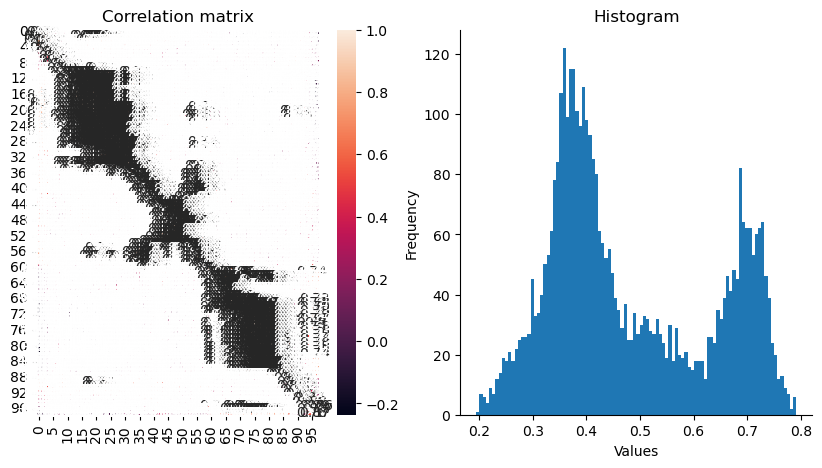

In [7]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(dfCCx.corr(),annot=True,ax=ax[0])
ax[0].set_title('Correlation matrix')

ax[1].hist(dfCCx.values.flatten(),bins=100)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Frequency')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)


dfCCx

,sub,age,JND_P,group_O,group_Y,group,sex
0,1.0,25.0,9.5600,0.0,1.0,Y,F
1,2.0,27.0,6.6900,0.0,1.0,Y,M
2,3.0,28.0,12.9200,0.0,1.0,Y,F
3,5.0,21.0,1.9500,0.0,1.0,Y,F
4,6.0,25.0,2.5400,0.0,1.0,Y,F
5,8.0,67.0,4.4800,1.0,0.0,O,F
6,9.0,73.0,9.6300,1.0,0.0,O,M
7,10.0,64.0,7.2700,1.0,0.0,O,F
8,11.0,21.0,1.6200,0.0,1.0,Y,F
9,12.0,21.0,3.6800,0.0,1.0,Y,M


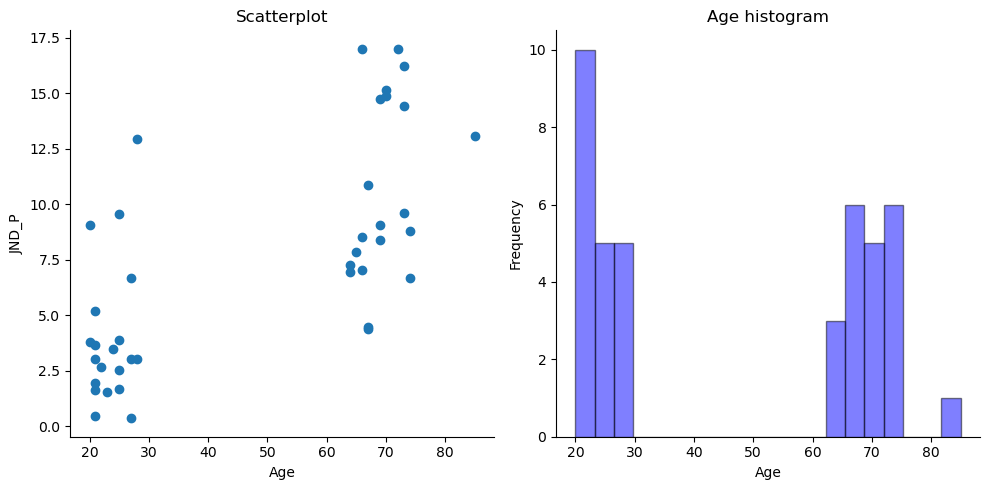

In [8]:

fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].scatter(Subject['age'],Subject['JND_P'])
ax[0].set_title('Scatterplot')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('JND_P')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].hist(Subject['age'],bins=20,color='blue',alpha=0.5,label='Age',edgecolor='black')
ax[1].set_title('Age histogram')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()

Subject